In [1]:
import os, sys
from os import listdir
from os.path import isfile, isdir, join
from tqdm.notebook import tqdm

In [2]:
import numpy as np
import cv2
from PIL import Image
from typing import Iterable, Dict, Callable

In [3]:
import pickle as pkl
from matplotlib import pyplot as plt
import json
%matplotlib inline

In [4]:
sc_adversary = './sc_adversary.pkl'
sc_adversary_features = './sc_adversary_features.pkl'
ft_adversary = './ft_adversary.pkl'
ft_adversary_features = './ft_adversary_features.pkl'
sc_gaussian = './sc_gaussian.pkl'
sc_gaussian_features = './sc_gaussian_features.pkl'
ft_gaussian = './ft_gaussian.pkl'
ft_gaussian_features = './ft_gaussian_features.pkl'
sc_weights = './sc_weights_operator_norm.pkl'
ft_weights = './ft_weights_operator_norm.pkl'
sc_sigma = str(465)
ft_sigma = str(126)

with open(sc_adversary, 'rb') as fp:
    sc_adversary_dict = pkl.load(fp)
with open(sc_adversary_features, 'rb') as fp:
    sc_adversary_features_dict = pkl.load(fp)
with open(ft_adversary, 'rb') as fp:
    ft_adversary_dict = pkl.load(fp)
with open(ft_adversary_features, 'rb') as fp:
    ft_adversary_features_dict = pkl.load(fp)
with open(sc_gaussian, 'rb') as fp:
    sc_gaussian_dict = pkl.load(fp)
with open(sc_gaussian_features, 'rb') as fp:
    sc_gaussian_features_dict = pkl.load(fp)
with open(ft_gaussian, 'rb') as fp:
    ft_gaussian_dict = pkl.load(fp)
with open(ft_gaussian_features, 'rb') as fp:
    ft_gaussian_features_dict = pkl.load(fp)
with open(sc_weights, 'rb') as fp:
    sc_weights_dict = pkl.load(fp)
with open(ft_weights, 'rb') as fp:
    ft_weights_dict = pkl.load(fp)

In [5]:
image_indices = [1121, 1673, 2422,  3198,  4026,  43,    4697,  5157,  5391,  6000,  6461,  7094, 7752,  8516,  8873,  9308,
1150,  1732,  2650,  3331,  403,   4496,  4741,  5187,  5531,  6025,  6624,  7272,  8010,  8640,  9020,  95,
1166,  1907,  2831,  3374,  4066,  4497,  4933,  519,   5670,  6034,  6818,  7446,  819,   8661,  9083,  9618,
1221,  2088,  2868,  3400,  4167,  4544,  4952,  5233,  5685,  6329,  6837,  7566,  8237,  8663,  914,   9907,
1605,  2189,  2889,  3541,  4359,  4593,  5112,  5351,  5905,  6394,  6888,  7633,  8391,  8671,  9159,  9926,
1625,  2346,  3093,  3754,  4362,  4686,  5153,  5384,  5931,  6406,  703,   7644,  8451,  8708,  9219,  9980]

layer_names = ['conv1', 'layer1.0.conv1', 'layer1.0.conv2', 'layer1.0.conv3', 'layer1.1.conv1', 'layer1.1.conv2', 'layer1.1.conv3',
               'layer1.2.conv1', 'layer1.2.conv2', 'layer1.2.conv3', 'layer2.0.conv1', 'layer2.0.conv2', 'layer2.0.conv3',
               'layer2.1.conv1', 'layer2.1.conv2', 'layer2.1.conv3', 'layer2.2.conv1', 'layer2.2.conv2', 'layer2.2.conv3',
               'layer2.3.conv1', 'layer2.3.conv2', 'layer2.3.conv3', 'layer3.0.conv1', 'layer3.0.conv2', 'layer3.0.conv3',
               'layer3.1.conv1', 'layer3.1.conv2', 'layer3.1.conv3', 'layer3.2.conv1', 'layer3.2.conv2', 'layer3.2.conv3',
               'layer3.3.conv1', 'layer3.3.conv2', 'layer3.3.conv3', 'layer3.4.conv1', 'layer3.4.conv2', 'layer3.4.conv3',
               'layer3.5.conv1', 'layer3.5.conv2', 'layer3.5.conv3', 'layer4.0.conv1', 'layer4.0.conv2', 'layer4.0.conv3',
               'layer4.1.conv1', 'layer4.1.conv2', 'layer4.1.conv3', 'layer4.2.conv1', 'layer4.2.conv2', 'layer4.2.conv3']

layer_sizes = ['$64 \\times 3 \\times 7 \\times 7$', '$64 \\times 64 \\times 1 \\times 1$', '$64 \\times 64 \\times 3 \\times 3$', '$256 \\times 64 \\times 1 \\times 1$', '$64 \\times 256 \\times 1 \\times 1$', '$64 \\times 64 \\times 3 \\times 3$', '$256 \\times 64 \\times 1 \\times 1$', '$64 \\times 256 \\times 1 \\times 1$', '$64 \\times 64 \\times 3 \\times 3$', '$256 \\times 64 \\times 1 \\times 1$', '$128 \\times 256 \\times 1 \\times 1$', '$128 \\times 128 \\times 3 \\times 3$', '$512 \\times 128 \\times 1 \\times 1$', '$128 \\times 512 \\times 1 \\times 1$', '$128 \\times 128 \\times 3 \\times 3$', '$512 \\times 128 \\times 1 \\times 1$', '$128 \\times 512 \\times 1 \\times 1$', '$128 \\times 128 \\times 3 \\times 3$', '$512 \\times 128 \\times 1 \\times 1$', '$128 \\times 512 \\times 1 \\times 1$', '$128 \\times 128 \\times 3 \\times 3$', '$512 \\times 128 \\times 1 \\times 1$', '$256 \\times 512 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$256 \\times 1024 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$256 \\times 1024 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$256 \\times 1024 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$256 \\times 1024 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$256 \\times 1024 \\times 1 \\times 1$', '$256 \\times 256 \\times 3 \\times 3$', '$1024 \\times 256 \\times 1 \\times 1$', '$512 \\times 1024 \\times 1 \\times 1$', '$512 \\times 512 \\times 3 \\times 3$', '$2048 \\times 512 \\times 1 \\times 1$', '$512 \\times 2048 \\times 1 \\times 1$', '$512 \\times 512 \\times 3 \\times 3$', '$2048 \\times 512 \\times 1 \\times 1$', '$512 \\times 2048 \\times 1 \\times 1$', '$512 \\times 512 \\times 3 \\times 3$', '$2048 \\times 512 \\times 1 \\times 1$']

# SCRATCH TRAINED GAUSSIAN ATTACK SPECTRAL ANALYSIS

In [6]:
save_dir = './sc_results_gaussian'
if not isdir(save_dir):
    os.mkdir(save_dir)

non_zero_counts = 0
total_counts = 0
avg_perturbation = 0
lipschitz_lb = 1e-9
lipschitz_ub = 1e-9
lipschitz = np.zeros((len(layer_names), len(image_indices), 2), dtype=float)
global_table = np.array([list(range(1, 50)), layer_names, layer_sizes]).T

for image_idx in tqdm(range(len(image_indices))):
    image_key = image_indices[image_idx]
    image_layer_analysis_dict = {}
    avg_perturbation += sc_gaussian_dict[sc_sigma][image_key]['l2']
    
    for layer_idx in range(len(layer_names)):
        layer_key = layer_names[layer_idx]
        layer_analysis_dict = {'LHS_feature_diff_norm':None, 'RHS_perturb_norm':None, 'RHS_operator_norm':None, 'HOLDS':None}

        layer_analysis_dict['LHS_feature_diff_norm'] = float(np.mean(sc_gaussian_features_dict[sc_sigma][image_key][layer_key]))
        layer_analysis_dict['RHS_perturb_norm'] = float(sc_gaussian_dict[sc_sigma][image_key]['l2'])
        layer_analysis_dict['RHS_operator_norm'] = float(np.mean(sc_weights_dict[layer_key+'.weight']['operator_norm']))
        layer_analysis_dict['HOLDS'] = layer_analysis_dict['LHS_feature_diff_norm']<=(layer_analysis_dict['RHS_operator_norm']*layer_analysis_dict['RHS_perturb_norm'])
        # print(layer_analysis_dict['HOLDS'],
        #       layer_analysis_dict['LHS_feature_diff_norm'],
        #       layer_analysis_dict['RHS_perturb_norm'],
        #       layer_analysis_dict['RHS_operator_norm'])

        image_layer_analysis_dict[layer_key] = layer_analysis_dict
        # if (layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm']))>lipschitz:
        #     lipschitz = layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm'])
        if (layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm'])>lipschitz_lb:
            lipschitz_lb = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        if layer_analysis_dict['RHS_operator_norm']>lipschitz_ub:
            lipschitz_ub = layer_analysis_dict['RHS_operator_norm']
        lipschitz[layer_idx, image_idx, 0] = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        lipschitz[layer_idx, image_idx, 1] = layer_analysis_dict['RHS_operator_norm']
        # break
    # print([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    
    non_zero_counts += np.sum(np.array([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names]))
    total_counts += len([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    with open(join(save_dir, '{}.json'.format(image_key)), 'w') as fp:
        json.dump(image_layer_analysis_dict, fp)
    # break
avg_perturbation /= len(image_indices)
lipschitz = np.around(np.mean(lipschitz, axis=1), 2)
global_table = np.concatenate([global_table, lipschitz], axis=1)
print(global_table.shape)

  0%|          | 0/96 [00:00<?, ?it/s]

(49, 5)


In [7]:
print('Accuracy:', non_zero_counts/total_counts)
print(avg_perturbation)
print(lipschitz_lb, lipschitz_ub)

Accuracy: 0.9521683673469388
124.21451091766357
0.38021322240911537 1.5675312280654907


# SCRATCH TRAINED ADVERSARIAL ATTACK SPECTRAL ANALYSIS

In [8]:
save_dir = './sc_results_adversary'
if not isdir(save_dir):
    os.mkdir(save_dir)

non_zero_counts = 0
total_counts = 0
avg_perturbation = 0
lipschitz_lb = 1e-9
lipschitz_ub = 1e-9
lipschitz = np.zeros((len(layer_names), len(image_indices), 2), dtype=float)

for image_idx in tqdm(range(len(image_indices))):
    image_key = image_indices[image_idx]
    image_layer_analysis_dict = {}
    avg_perturbation += sc_adversary_dict[image_key]['avg']

    for layer_idx in range(len(layer_names)):
        layer_key = layer_names[layer_idx]
        layer_analysis_dict = {'LHS_feature_diff_norm':None, 'RHS_perturb_norm':None, 'RHS_operator_norm':None, 'HOLDS':None}

        layer_analysis_dict['LHS_feature_diff_norm'] = float(np.mean(sc_adversary_features_dict[image_key][layer_key]))
        layer_analysis_dict['RHS_perturb_norm'] = float(sc_adversary_dict[image_key]['l2'])
        layer_analysis_dict['RHS_operator_norm'] = float(np.mean(sc_weights_dict[layer_key+'.weight']['operator_norm']))
        layer_analysis_dict['HOLDS'] = layer_analysis_dict['LHS_feature_diff_norm']<=(layer_analysis_dict['RHS_operator_norm']*layer_analysis_dict['RHS_perturb_norm'])
        # print(layer_analysis_dict['HOLDS'],
        #       layer_analysis_dict['LHS_feature_diff_norm'],
        #       layer_analysis_dict['RHS_perturb_norm'],
        #       layer_analysis_dict['RHS_operator_norm'])

        image_layer_analysis_dict[layer_key] = layer_analysis_dict
        # if (layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm']))>lipschitz:
        #     lipschitz = layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm'])
        if (layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm'])>lipschitz_lb:
            lipschitz_lb = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        if layer_analysis_dict['RHS_operator_norm']>lipschitz_ub:
            lipschitz_ub = layer_analysis_dict['RHS_operator_norm']
        lipschitz[layer_idx, image_idx, 0] = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        lipschitz[layer_idx, image_idx, 1] = layer_analysis_dict['RHS_operator_norm']
        # break
    # print([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    
    non_zero_counts += np.sum(np.array([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names]))
    total_counts += len([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    with open(join(save_dir, '{}.json'.format(image_key)), 'w') as fp:
        json.dump(image_layer_analysis_dict, fp)
    # break
avg_perturbation /= len(image_indices)
lipschitz = np.around(np.mean(lipschitz, axis=1), 2)
global_table = np.concatenate([global_table, lipschitz], axis=1)
print(global_table.shape)

  0%|          | 0/96 [00:00<?, ?it/s]

(49, 7)


In [9]:
print('Accuracy:', non_zero_counts/total_counts)
print(avg_perturbation)
print(lipschitz_lb, lipschitz_ub)

Accuracy: 0.6222363945578231
6.087647245584434
0.8660878198963567 1.5675312280654907


In [10]:
for i in range(len(layer_names)):
    print(' & '.join(global_table[i, :].tolist())+' \\\\ \\hline')

1 & conv1 & $64 \times 3 \times 7 \times 7$ & 0.1 & 1.57 & 0.18 & 1.57 \\ \hline
2 & layer1.0.conv1 & $64 \times 64 \times 1 \times 1$ & 0.13 & 0.31 & 0.12 & 0.31 \\ \hline
3 & layer1.0.conv2 & $64 \times 64 \times 3 \times 3$ & 0.26 & 0.71 & 0.2 & 0.71 \\ \hline
4 & layer1.0.conv3 & $256 \times 64 \times 1 \times 1$ & 0.16 & 0.26 & 0.11 & 0.26 \\ \hline
5 & layer1.1.conv1 & $64 \times 256 \times 1 \times 1$ & 0.26 & 0.26 & 0.24 & 0.26 \\ \hline
6 & layer1.1.conv2 & $64 \times 64 \times 3 \times 3$ & 0.35 & 0.71 & 0.23 & 0.71 \\ \hline
7 & layer1.1.conv3 & $256 \times 64 \times 1 \times 1$ & 0.22 & 0.26 & 0.11 & 0.26 \\ \hline
8 & layer1.2.conv1 & $64 \times 256 \times 1 \times 1$ & 0.3 & 0.26 & 0.27 & 0.26 \\ \hline
9 & layer1.2.conv2 & $64 \times 64 \times 3 \times 3$ & 0.34 & 0.71 & 0.26 & 0.71 \\ \hline
10 & layer1.2.conv3 & $256 \times 64 \times 1 \times 1$ & 0.23 & 0.26 & 0.12 & 0.26 \\ \hline
11 & layer2.0.conv1 & $128 \times 256 \times 1 \times 1$ & 0.22 & 0.25 & 0.32 & 0.25 \\

# FINE TUNED GAUSSIAN ATTACK SPECTRAL ANALYSIS

In [11]:
save_dir = './ft_results_gaussian'
if not isdir(save_dir):
    os.mkdir(save_dir)

non_zero_counts = 0
total_counts = 0
avg_perturbation = 0
lipschitz_lb = 1e-9
lipschitz_ub = 1e-9
lipschitz = np.zeros((len(layer_names), len(image_indices), 2), dtype=float)
global_table = np.array([list(range(1, 50)), layer_names, layer_sizes]).T

for image_idx in tqdm(range(len(image_indices))):
    image_key = image_indices[image_idx]
    image_layer_analysis_dict = {}
    avg_perturbation += ft_gaussian_dict[ft_sigma][image_key]['l2']
    
    for layer_idx in range(len(layer_names)):
        layer_key = layer_names[layer_idx]
        layer_analysis_dict = {'LHS_feature_diff_norm':None, 'RHS_perturb_norm':None, 'RHS_operator_norm':None, 'HOLDS':None}

        layer_analysis_dict['LHS_feature_diff_norm'] = float(np.mean(ft_gaussian_features_dict[ft_sigma][image_key][layer_key]))
        layer_analysis_dict['RHS_perturb_norm'] = float(ft_gaussian_dict[ft_sigma][image_key]['l2'])
        layer_analysis_dict['RHS_operator_norm'] = float(np.mean(ft_weights_dict[layer_key+'.weight']['operator_norm']))
        layer_analysis_dict['HOLDS'] = layer_analysis_dict['LHS_feature_diff_norm']<=(layer_analysis_dict['RHS_operator_norm']*layer_analysis_dict['RHS_perturb_norm'])
        # print(layer_analysis_dict['HOLDS'],
        #       layer_analysis_dict['LHS_feature_diff_norm'],
        #       layer_analysis_dict['RHS_perturb_norm'],
        #       layer_analysis_dict['RHS_operator_norm'])

        image_layer_analysis_dict[layer_key] = layer_analysis_dict
        # if (layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm']))>lipschitz:
        #     lipschitz = layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm'])
        if (layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm'])>lipschitz_lb:
            lipschitz_lb = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        if layer_analysis_dict['RHS_operator_norm']>lipschitz_ub:
            lipschitz_ub = layer_analysis_dict['RHS_operator_norm']
        lipschitz[layer_idx, image_idx, 0] = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        lipschitz[layer_idx, image_idx, 1] = layer_analysis_dict['RHS_operator_norm']
        # break
    # print([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    
    non_zero_counts += np.sum(np.array([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names]))
    total_counts += len([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    with open(join(save_dir, '{}.json'.format(image_key)), 'w') as fp:
        json.dump(image_layer_analysis_dict, fp)
    # break
avg_perturbation /= len(image_indices)
lipschitz = np.around(np.mean(lipschitz, axis=1), 2)
global_table = np.concatenate([global_table, lipschitz], axis=1)
print(global_table.shape)

  0%|          | 0/96 [00:00<?, ?it/s]

(49, 5)


In [12]:
print('Accuracy:', non_zero_counts/total_counts)
print(avg_perturbation)
print(lipschitz_lb, lipschitz_ub)

Accuracy: 0.9574829931972789
33.70786190032959
0.24317411341365983 2.007394313812256


# FINE TUNED ADVERSARIAL ATTACK SPECTRAL ANALYSIS

In [13]:
save_dir = './ft_results_adversary'
if not isdir(save_dir):
    os.mkdir(save_dir)

non_zero_counts = 0
total_counts = 0
avg_perturbation = 0
lipschitz_lb = 1e-9
lipschitz_ub = 1e-9
lipschitz = np.zeros((len(layer_names), len(image_indices), 2), dtype=float)

for image_idx in tqdm(range(len(image_indices))):
    image_key = image_indices[image_idx]
    image_layer_analysis_dict = {}
    avg_perturbation += ft_adversary_dict[image_key]['l2']

    for layer_idx in range(len(layer_names)):
        layer_key = layer_names[layer_idx]
        layer_analysis_dict = {'LHS_feature_diff_norm':None, 'RHS_perturb_norm':None, 'RHS_operator_norm':None, 'HOLDS':None}

        layer_analysis_dict['LHS_feature_diff_norm'] = float(np.mean(ft_adversary_features_dict[image_key][layer_key]))
        layer_analysis_dict['RHS_perturb_norm'] = float(ft_adversary_dict[image_key]['l2'])
        layer_analysis_dict['RHS_operator_norm'] = float(np.mean(ft_weights_dict[layer_key+'.weight']['operator_norm']))
        layer_analysis_dict['HOLDS'] = layer_analysis_dict['LHS_feature_diff_norm']<=(layer_analysis_dict['RHS_operator_norm']*layer_analysis_dict['RHS_perturb_norm'])
        # print(layer_analysis_dict['HOLDS'],
        #       layer_analysis_dict['LHS_feature_diff_norm'],
        #       layer_analysis_dict['RHS_perturb_norm'],
        #       layer_analysis_dict['RHS_operator_norm'])

        image_layer_analysis_dict[layer_key] = layer_analysis_dict
        # if (layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm']))>lipschitz:
        #     lipschitz = layer_analysis_dict['LHS_feature_diff_norm']/(layer_analysis_dict['RHS_perturb_norm']*layer_analysis_dict['RHS_operator_norm'])
        if (layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm'])>lipschitz_lb:
            lipschitz_lb = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        if layer_analysis_dict['RHS_operator_norm']>lipschitz_ub:
            lipschitz_ub = layer_analysis_dict['RHS_operator_norm']
        lipschitz[layer_idx, image_idx, 0] = layer_analysis_dict['LHS_feature_diff_norm']/layer_analysis_dict['RHS_perturb_norm']
        lipschitz[layer_idx, image_idx, 1] = layer_analysis_dict['RHS_operator_norm']
        # break
    # print([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    
    non_zero_counts += np.sum(np.array([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names]))
    total_counts += len([image_layer_analysis_dict[f]['HOLDS'] for f in layer_names])
    with open(join(save_dir, '{}.json'.format(image_key)), 'w') as fp:
        json.dump(image_layer_analysis_dict, fp)
    # break
avg_perturbation /= len(image_indices)
lipschitz = np.around(np.mean(lipschitz, axis=1), 2)
global_table = np.concatenate([global_table, lipschitz], axis=1)
print(global_table.shape)

  0%|          | 0/96 [00:00<?, ?it/s]

(49, 7)


In [14]:
print('Accuracy:', non_zero_counts/total_counts)
print(avg_perturbation)
print(lipschitz_lb, lipschitz_ub)

Accuracy: 0.9387755102040817
12.299998372793198
0.27467365420213874 2.007394313812256


In [15]:
for i in range(len(layer_names)):
    print(' & '.join(global_table[i, :].tolist())+' \\\\ \\hline')

1 & conv1 & $64 \times 3 \times 7 \times 7$ & 0.24 & 2.01 & 0.13 & 2.01 \\ \hline
2 & layer1.0.conv1 & $64 \times 64 \times 1 \times 1$ & 0.21 & 0.16 & 0.1 & 0.16 \\ \hline
3 & layer1.0.conv2 & $64 \times 64 \times 3 \times 3$ & 0.15 & 0.37 & 0.11 & 0.37 \\ \hline
4 & layer1.0.conv3 & $256 \times 64 \times 1 \times 1$ & 0.07 & 0.12 & 0.06 & 0.12 \\ \hline
5 & layer1.1.conv1 & $64 \times 256 \times 1 \times 1$ & 0.12 & 0.12 & 0.1 & 0.12 \\ \hline
6 & layer1.1.conv2 & $64 \times 64 \times 3 \times 3$ & 0.09 & 0.41 & 0.1 & 0.41 \\ \hline
7 & layer1.1.conv3 & $256 \times 64 \times 1 \times 1$ & 0.04 & 0.12 & 0.04 & 0.12 \\ \hline
8 & layer1.2.conv1 & $64 \times 256 \times 1 \times 1$ & 0.09 & 0.13 & 0.09 & 0.13 \\ \hline
9 & layer1.2.conv2 & $64 \times 64 \times 3 \times 3$ & 0.07 & 0.47 & 0.09 & 0.47 \\ \hline
10 & layer1.2.conv3 & $256 \times 64 \times 1 \times 1$ & 0.04 & 0.11 & 0.04 & 0.11 \\ \hline
11 & layer2.0.conv1 & $128 \times 256 \times 1 \times 1$ & 0.1 & 0.14 & 0.1 & 0.14 \\ \

In [29]:
src_image_dir = './sc_gaussian_features/original/src'
sc_gaussian_image_dir = './sc_gaussian/465'
sc_adversary_image_dir = './sc_adversary/'
ft_gaussian_image_dir = './ft_gaussian/126'
ft_adversary_image_dir = './ft_adversary/'

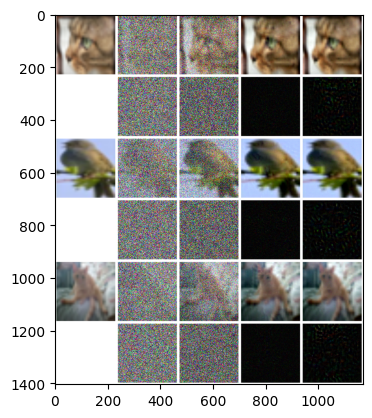

In [43]:
img_list = []

for img_idx in range(3):
    img_name = str(image_indices[img_idx])+'.png'
    noise_img = str(image_indices[img_idx])+'_noise.png'
    # print(join(src_image_dir, img_name), isfile(join(src_image_dir, img_name)))
    src_img = cv2.imread(join(src_image_dir, img_name), cv2.IMREAD_COLOR)
    sc_gaussian_image = cv2.imread(join(sc_gaussian_image_dir, img_name), cv2.IMREAD_COLOR)
    sc_adversary_image = cv2.imread(join(sc_adversary_image_dir, img_name), cv2.IMREAD_COLOR)
    ft_gaussian_image = cv2.imread(join(ft_gaussian_image_dir, img_name), cv2.IMREAD_COLOR)
    ft_adversary_image = cv2.imread(join(ft_adversary_image_dir, img_name), cv2.IMREAD_COLOR)
    sc_gaussian_image_noise = cv2.imread(join(sc_gaussian_image_dir, noise_img), cv2.IMREAD_COLOR)
    sc_adversary_image_noise = cv2.imread(join(sc_adversary_image_dir, noise_img), cv2.IMREAD_COLOR)
    ft_gaussian_image_noise = cv2.imread(join(ft_gaussian_image_dir, noise_img), cv2.IMREAD_COLOR)
    ft_adversary_image_noise = cv2.imread(join(ft_adversary_image_dir, noise_img), cv2.IMREAD_COLOR)
    # print(src_img.shape)

    src_img = np.pad(src_img, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    sc_gaussian_image = np.pad(sc_gaussian_image, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    sc_adversary_image = np.pad(sc_adversary_image, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    ft_gaussian_image = np.pad(ft_gaussian_image, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    ft_adversary_image = np.pad(ft_adversary_image, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)

    src_pad = np.ones_like(src_img)*255
    sc_gaussian_image_noise = np.pad(sc_gaussian_image_noise, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    sc_adversary_image_noise = np.pad(sc_adversary_image_noise, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    ft_gaussian_image_noise = np.pad(ft_gaussian_image_noise, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    ft_adversary_image_noise = np.pad(ft_adversary_image_noise, ((5, 5), (5, 5), (0, 0)), mode='constant', constant_values=255)
    
    img_row = np.concatenate([src_img, sc_gaussian_image, ft_gaussian_image, sc_adversary_image, ft_adversary_image], axis=1)
    noise_row = np.concatenate([src_pad, sc_gaussian_image_noise, ft_gaussian_image_noise, ft_adversary_image_noise, sc_adversary_image_noise], axis=1)
    img_row = np.concatenate([img_row, noise_row], axis=0)
    img_list.append(img_row)

img_list = np.concatenate(img_list, axis=0)
cv2.imwrite('./attack.png', img_list)
plt.imshow(img_list[..., ::-1])